In [1]:
import networkx as nx
import random 
import matplotlib.pyplot as plt

#chosing fast graph as it performs faster as compare to gnp_random_graph
G=nx.fast_gnp_random_graph(500,0.30)

# nx.draw(G,pos=nx.spring_layout(G), node_size=0.2, width=0.25)
# print("Initial degree centralities of a random graph:",nx.degree_centrality(G))
# print("Initial betweenness centralities of a random graph:",nx.betweenness_centrality(G))
# print("Initial closeness centralities of a random graph:",nx.closeness_centrality(G))
# print("Initial diameter of a random graph:",nx.diameter(G))
# print("The clustering coefficients for node 0:",nx.clustering(G,0))

In [4]:
new_diameter = []
new_diameter1=[]
new_size1=[]
new_size = []
removed_nodes = 0
removed_nodelist=[]

def GraphPlot(new_Values, Label):

  plt.figure()
  plt.grid(True)
  plt.plot(removed_nodelist, new_Values, 'ro-')
  plt.ylabel(Label + 'of GC')
  plt.xlabel('Number of removed nodes')
  plt.title(Label + 'Distribution')
  plt.show()
  plt.close()

def diffAttacks(Orig_graph, attackType):

  new_Graph=Orig_graph.copy()
  nnodes=nx.number_of_nodes(new_Graph)
  Diameter=nx.diameter(new_Graph)
  

  if attackType=='Random Attack':
    for i in range (50):
      ListOfNodes=nx.nodes(new_Graph)
      sample=50     #Removing 50% of nodes

      try:
        RandomSample=random.sample(ListOfNodes,sample)
        new_Graph.remove_nodes_from(RandomSample)

        NumberOfNodes=nx.number_of_nodes(new_Graph)
        new_diameter1=nx.diameter(new_Graph)
        new_size1=nx.number_of_nodes(new_Graph)
        new_diameter.append(round((new_diameter1/Diameter),2))
        new_size.append(round((new_size1/nnodes),2))
        removed_nodes=NumberOfNodes-new_size1   #change here from NumberOfNodes to ListOfNodes
        removed_nodelist.append(round((new_size1/nnodes),2))
        nx.draw(new_Graph,pos=nx.spring_layout(new_Graph), node_size=0.2, width=0.25)
        # print('Diameter after attack:', new_diameter1)
        # print('Number of nodes after attack:', nx.number_of_nodes(new_Graph))
        # print('Degree centrality after attack:', nx.degree_centrality(new_Graph))
        # print('Betweenness Centrality:', nx.betweenness_centrality(new_Graph))
        # print(nx.info(new_Graph))
      except:
        return

  elif attackType=='Degree Attack':

    for i in range(50):

      Nodes = sorted(new_Graph.degree, key=lambda x: x[1], reverse=True )[:8]
      remove_nodes = [i[0] for i in Nodes]
      new_Graph.remove_nodes_from(remove_nodes)
      new_Graph=new_Graph.copy()
      NumberOfNodes=nx.number_of_nodes(new_Graph)
      new_diameter1=nx.diameter(new_Graph)
      new_size1=nx.number_of_nodes(new_Graph)
      new_diameter.append(round((new_diameter1/Diameter),2))
      new_size.append(round((new_size1/nnodes),2))
      removed_nodes=NumberOfNodes-new_size1
      removed_nodelist.append(round((new_size1/nnodes),2))
      nx.draw(new_Graph,pos=nx.spring_layout(new_Graph), node_size=0.2, width=0.25)
      # print('Diameter after attack:', nx.diameter(new_Graph))
      # print('Number of nodes after attack:', nx.number_of_nodes(new_Graph))
      # print('Betweenness Centrality:', nx.betweenness_centrality(new_Graph))
      # print(nx.info(new_Graph))
   #different types of attacks
  

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
[0.98, 0.97, 0.95, 0.94, 0.92, 0.9, 0.89, 0.87, 0.86, 0.84, 0.82, 0.81, 0.79, 0.78, 0.76, 0.74, 0.73, 0.71, 0.7, 0.68, 0.66, 0.65, 0.63, 0.62, 0.6, 0.58, 0.57, 0.55, 0.54, 0.52, 0.5, 0.49, 0.47, 0.46, 0.44, 0.42, 0.41, 0.39, 0.38, 0.36, 0.34, 0.33, 0.31, 0.3, 0.28, 0.26, 0.25, 0.23, 0.22, 0.2]


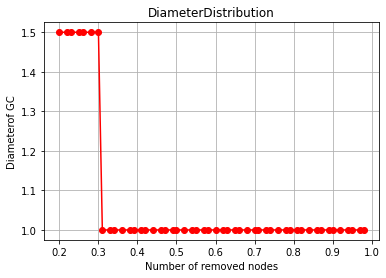

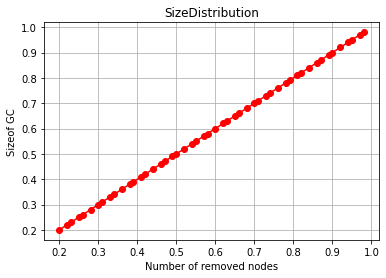

In [3]:
diffAttacks(G,'Degree Attack')
print(new_diameter)
print(new_size)
GraphPlot(new_diameter,'Diameter')
GraphPlot(new_size,'Size')   

/var/folders/rp/9rwmv8s16kn3hl7tsyh7cy200000gn/T/ipykernel_71889/3848789127.py:32: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  RandomSample=random.sample(ListOfNodes,sample)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5]
[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]


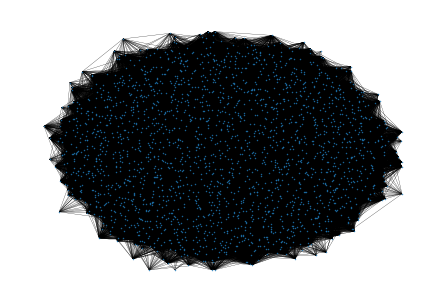

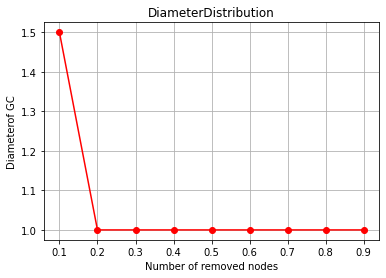

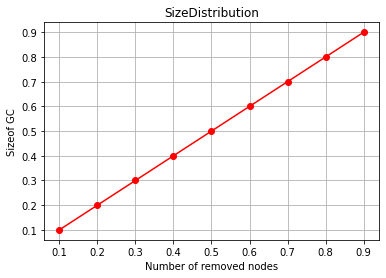

In [5]:
diffAttacks(G,'Random Attack')
print(new_diameter)
print(new_size)
GraphPlot(new_diameter,'Diameter')
GraphPlot(new_size,'Size')   